In [1]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
#Load in the data
tesla = pd.read_csv('tesla.csv', names=['timestamp', 'tweet'], encoding='utf-8')

In [3]:
#Make the timestamp column into a date time
tesla.timestamp = pd.to_datetime(tesla.timestamp)

In [4]:
tesla.tweet[0]

"b'@JosephVVallace @kokid951 @WholeMarsBlog @Kristennetten @elonmusk @thestinkmarket @28delayslater  this method start\\xe2\\x80\\xa6 https://t.co/R6duwcMeOO'"

In [5]:
tesla.head()

,timestamp,tweet
0,2021-05-09 19:32:32,b'@JosephVVallace @kokid951 @WholeMarsBlog @Kr...
1,2021-05-09 19:32:24,b'$TSLA with a rising channel on the daily cha...
2,2021-05-09 19:31:53,b'$Tsla weekly doesn\xe2\x80\x99t look good ht...
3,2021-05-09 19:31:44,b'Oopsie. I\xe2\x80\x99d be bitter if I shorte...
4,2021-05-09 19:31:34,b'TSLAQ groups are like the same as Flat Earth...


In [6]:
#This gets rid of the b' at the beginning of each tweet and ' at the end. 
tesla.tweet = tesla.tweet.str[2:]
tesla.tweet = tesla.tweet.str[:len(tesla.tweet)]

In [7]:
#Sort by timestamp time since I ran this twice and wasn't in order
tesla = tesla.sort_values(by=['timestamp'])

#Gets rid of duplicated tweets. This gets rid of people copying and pasting stuff and also 
#gets rid of tweets I got twice from running the code
tesla = tesla.drop_duplicates(subset=['tweet'])

In [8]:
#Convert from UTC to EST which is what the stock market time will be in
tesla.timestamp = tesla.timestamp - timedelta(hours=4)

In [9]:
tesla.head()

,timestamp,tweet
42303,2021-05-02 06:30:29,Here\xe2\x80\x99s the skit @TimJDillon . @elon...
42302,2021-05-02 06:31:33,[Last 24 Hours]\n\nStocks trending among elite...
42301,2021-05-02 06:34:14,Who will stop the Tesla madness?\n\n1. Autopil...
42300,2021-05-02 06:43:32,"Take a look inside Astra's rocket factory, as ..."
42299,2021-05-02 06:48:56,Do you what I find the most annoying. People t...


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob


#Make a new cleaned tweets column
tesla['cleaned'] = tesla.tweet.astype(str)
 
#Apply lower to all the tweets
tesla.cleaned = tesla.cleaned.apply(lambda x: " ".join(x.lower() for x in x.split()))

#This removes Twitter handles starting with @
tesla.cleaned = tesla.cleaned.apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))

#This removes stop words that will be useless in our tweets
stop = stopwords.words('english')
tesla.cleaned = tesla.cleaned.apply(lambda x: " ".join(x for x in x.split() if x not in stop))


#This stems all of our words
stemmer = PorterStemmer()
tesla.cleaned = tesla.cleaned.apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

tesla

,timestamp,tweet,cleaned
42303,2021-05-02 06:30:29,Here\xe2\x80\x99s the skit @TimJDillon . @elon...,here\xe2\x80\x99 skit . sharehold meet advis p...
42302,2021-05-02 06:31:33,[Last 24 Hours]\n\nStocks trending among elite...,[last 24 hours]\n\nstock trend among elit #fin...
42301,2021-05-02 06:34:14,Who will stop the Tesla madness?\n\n1. Autopil...,stop tesla madness?\n\n1. autopilot fulli deve...
42300,2021-05-02 06:43:32,"Take a look inside Astra's rocket factory, as ...","take look insid astra' rocket factory, compani..."
42299,2021-05-02 06:48:56,Do you what I find the most annoying. People t...,find annoying. peopl lie $tsla. \n\ndo know wh...
...,...,...,...
150299,2021-05-26 18:16:07,Keep shorting $tsla. \n\nThis short squeeze go...,keep short $tsla. \n\nthi short squeez gonna e...
150298,2021-05-26 18:16:19,"\xf0\x9f\x9a\xa8 Worker Hell at #Tesla: ""Tesla...","\xf0\x9f\x9a\xa8 worker hell #tesla: ""tesla in..."
150297,2021-05-26 18:17:07,The only 2 stocks that generally never disappo...,2 stock gener never disappoint $tsla $roku alw...
150296,2021-05-26 18:18:09,"$TSLA , $ COIN and $SQ call https://t.co/XKK4q...","$tsla , $ coin $sq call https://t.co/xkk4qbjut1'"


In [11]:
def polar(x):
    return TextBlob(x).sentiment.polarity

In [12]:
tesla['sentiment'] = tesla.cleaned.apply(polar)

In [13]:
tesla

,timestamp,tweet,cleaned,sentiment
42303,2021-05-02 06:30:29,Here\xe2\x80\x99s the skit @TimJDillon . @elon...,here\xe2\x80\x99 skit . sharehold meet advis p...,0.000000
42302,2021-05-02 06:31:33,[Last 24 Hours]\n\nStocks trending among elite...,[last 24 hours]\n\nstock trend among elit #fin...,0.000000
42301,2021-05-02 06:34:14,Who will stop the Tesla madness?\n\n1. Autopil...,stop tesla madness?\n\n1. autopilot fulli deve...,0.100000
42300,2021-05-02 06:43:32,"Take a look inside Astra's rocket factory, as ...","take look insid astra' rocket factory, compani...",0.000000
42299,2021-05-02 06:48:56,Do you what I find the most annoying. People t...,find annoying. peopl lie $tsla. \n\ndo know wh...,-0.266667
...,...,...,...,...
150299,2021-05-26 18:16:07,Keep shorting $tsla. \n\nThis short squeeze go...,keep short $tsla. \n\nthi short squeez gonna e...,0.033333
150298,2021-05-26 18:16:19,"\xf0\x9f\x9a\xa8 Worker Hell at #Tesla: ""Tesla...","\xf0\x9f\x9a\xa8 worker hell #tesla: ""tesla in...",0.000000
150297,2021-05-26 18:17:07,The only 2 stocks that generally never disappo...,2 stock gener never disappoint $tsla $roku alw...,0.000000
150296,2021-05-26 18:18:09,"$TSLA , $ COIN and $SQ call https://t.co/XKK4q...","$tsla , $ coin $sq call https://t.co/xkk4qbjut1'",0.000000


In [14]:
tesla2 = tesla.resample(rule='30min', on='timestamp').mean()
tesla2

,sentiment
timestamp,
2021-05-02 06:30:00,0.115972
2021-05-02 07:00:00,0.108985
2021-05-02 07:30:00,0.023372
2021-05-02 08:00:00,0.065711
2021-05-02 08:30:00,0.070162
...,...
2021-05-26 16:00:00,0.078281
2021-05-26 16:30:00,0.043313
2021-05-26 17:00:00,0.092743


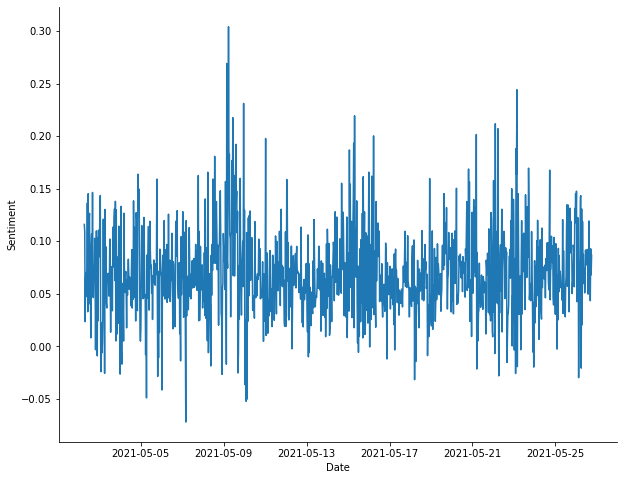

In [15]:
plt.figure(figsize=(10,8))
plt.plot(tesla2.sentiment)
plt.xlabel('Date'), plt.ylabel('Sentiment')
sns.despine(right=True, top=True)
plt.show()

In [16]:
tesla2 = tesla2.reset_index()
tesla2.timestamp = tesla2.timestamp - timedelta(hours=0.5)
tesla2

,timestamp,sentiment
0,2021-05-02 06:00:00,0.115972
1,2021-05-02 06:30:00,0.108985
2,2021-05-02 07:00:00,0.023372
3,2021-05-02 07:30:00,0.065711
4,2021-05-02 08:00:00,0.070162
...,...,...
1171,2021-05-26 15:30:00,0.078281
1172,2021-05-26 16:00:00,0.043313
1173,2021-05-26 16:30:00,0.092743
1174,2021-05-26 17:00:00,0.067886


In [17]:
teslastock = pd.read_excel('Tesla Stock Prices.xlsx', header=1)

In [18]:
teslastock

,Time,2021-05-10 00:00:00,2021-05-11 00:00:00,2021-05-12 00:00:00,2021-05-13 00:00:00,2021-05-14 00:00:00,2021-05-18 00:00:00,2021-05-19 00:00:00,2021-05-20 00:00:00,2021-05-21 00:00:00,2021-05-24 00:00:00,2021-05-25 00:00:00,2021-05-26 00:00:00,2021-05-27 00:00:00
0,09:30:00,659.30,598.93,609.59,598.99,580.33,574.99,553.65,572.48,592.01,575.82,604.61,605.47,619.19
1,10:00:00,649.99,621.51,612.26,599.56,576.05,572.05,547.82,580.21,591.93,589.09,603.35,602.19,627.20
2,10:30:00,645.55,604.26,603.26,591.37,588.42,587.90,555.47,583.03,589.81,595.58,601.42,612.12,627.00
3,11:00:00,644.48,603.08,604.35,583.01,583.81,584.62,551.77,580.43,585.36,595.59,600.77,617.31,621.30
4,11:30:00,643.93,612.67,600.96,577.41,586.22,591.77,553.28,581.22,585.32,599.50,595.98,615.59,618.79
5,12:00:00,644.65,618.34,598.54,570.63,583.32,584.08,553.70,578.99,583.14,600.50,599.36,622.32,619.84
6,12:30:00,643.88,611.99,599.82,578.42,583.19,587.19,558.10,577.26,586.39,599.17,600.71,622.28,618.76
7,13:00:00,640.17,614.44,606.14,573.26,579.09,582.90,559.12,575.92,586.47,600.57,598.94,620.89,622.79
8,13:30:00,637.65,621.09,601.77,562.02,577.59,591.66,560.63,580.46,587.24,604.98,602.50,622.56,620.69
9,14:00:00,636.16,621.02,601.50,568.87,579.44,583.86,557.37,579.76,587.99,605.95,601.50,622.77,619.28


In [19]:
teslastock = pd.melt(teslastock, id_vars="Time")
teslastock = teslastock.rename(columns={'variable':'date', 'value':'price'})
teslastock

,Time,date,price
0,09:30:00,2021-05-10,659.30
1,10:00:00,2021-05-10,649.99
2,10:30:00,2021-05-10,645.55
3,11:00:00,2021-05-10,644.48
4,11:30:00,2021-05-10,643.93
...,...,...,...
177,14:00:00,2021-05-27,619.28
178,14:30:00,2021-05-27,618.51
179,15:00:00,2021-05-27,619.10
180,15:30:00,2021-05-27,618.90


In [20]:
teslastock['timestamp'] = teslastock.date.astype(str) + ' ' + teslastock.Time.astype(str)

In [21]:
teslastock.timestamp = pd.to_datetime(teslastock.timestamp)

In [22]:
teslastock = teslastock.drop(['Time', 'date'], axis=1)

In [23]:
teslastock

,price,timestamp
0,659.30,2021-05-10 09:30:00
1,649.99,2021-05-10 10:00:00
2,645.55,2021-05-10 10:30:00
3,644.48,2021-05-10 11:00:00
4,643.93,2021-05-10 11:30:00
...,...,...
177,619.28,2021-05-27 14:00:00
178,618.51,2021-05-27 14:30:00
179,619.10,2021-05-27 15:00:00
180,618.90,2021-05-27 15:30:00


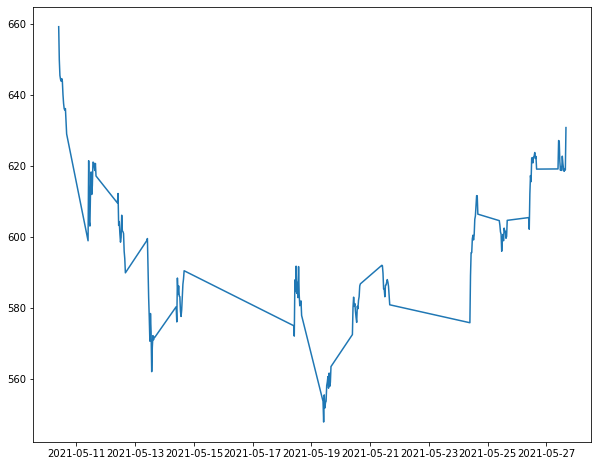

In [24]:
plt.figure(figsize=(10,8))
plt.plot(teslastock.timestamp, teslastock.price)
plt.show()

In [25]:
teslacombined = tesla2.merge(teslastock, on='timestamp')

In [26]:
teslacombined

,timestamp,sentiment,price
0,2021-05-10 09:30:00,0.040690,659.30
1,2021-05-10 10:00:00,0.048089,649.99
2,2021-05-10 10:30:00,0.041105,645.55
3,2021-05-10 11:00:00,0.026727,644.48
4,2021-05-10 11:30:00,0.118714,643.93
...,...,...,...
163,2021-05-26 14:00:00,0.074873,622.77
164,2021-05-26 14:30:00,0.119256,623.82
165,2021-05-26 15:00:00,0.060119,622.14
166,2021-05-26 15:30:00,0.078281,622.72


In [27]:
teslacombined['norm_sent'] = (teslacombined.sentiment-teslacombined.sentiment.min())/(teslacombined.sentiment.max()-teslacombined.sentiment.min())
teslacombined['norm_price'] = (teslacombined.price - teslacombined.price.min())/(teslacombined.price.max()-teslacombined.price.min())

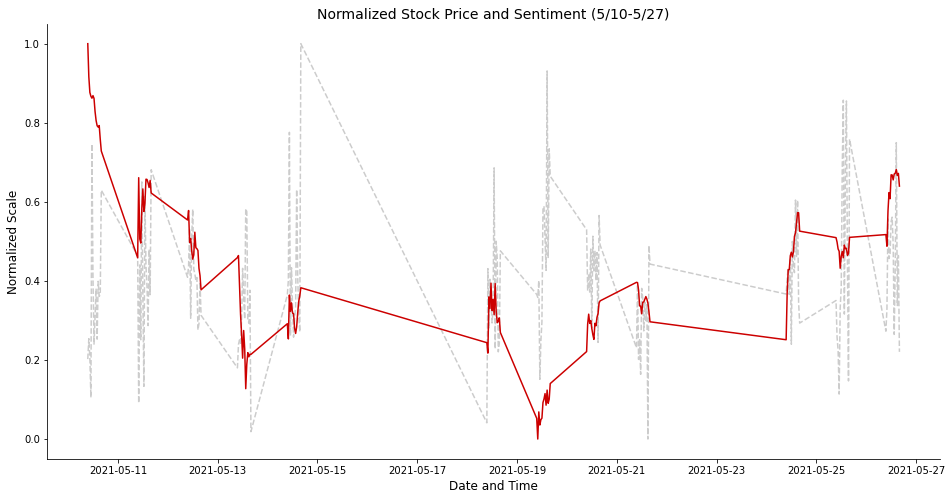

In [28]:
plt.figure(figsize=(16,8))
plt.plot(teslacombined.timestamp, teslacombined.norm_sent, color="#cccccc", linestyle = '--')
plt.plot(teslacombined.timestamp, teslacombined.norm_price, color='#cc0000')
sns.despine(top=True, right=True)
plt.xlabel('Date and Time', fontsize=12), plt.ylabel('Normalized Scale', fontsize=12)
plt.title('Normalized Stock Price and Sentiment (5/10-5/27)', fontsize=14)
plt.show()

In [29]:
doge = pd.read_csv('doge3.csv', names=['datetime', 'tweet'])

In [30]:
doge.datetime =  pd.to_datetime(doge.datetime)

In [31]:
doge.tweet = doge.tweet.str[2:]
doge.tweet = doge.tweet.str[:len(doge.tweet)]

In [32]:
#Sort by timestamp time since I ran this twice and wasn't in order
doge = doge.sort_values(by=['datetime'])

#Gets rid of duplicated tweets. This gets rid of people copying and pasting stuff and also 
#gets rid of tweets I got twice from running the code
doge = doge.drop_duplicates(subset=['tweet'])

In [33]:
tesla.timestamp = tesla.timestamp - timedelta(hours=4)

In [34]:
#Make a new cleaned tweets column
doge['cleaned'] = doge.tweet.astype(str)
 
#Apply lower to all the tweets
doge.cleaned = doge.cleaned.apply(lambda x: " ".join(x.lower() for x in x.split()))

#This removes Twitter handles starting with @
doge.cleaned = doge.cleaned.apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))

#This removes stop words that will be useless in our tweets
stop = stopwords.words('english')
doge.cleaned = doge.cleaned.apply(lambda x: " ".join(x for x in x.split() if x not in stop))


#This stems all of our words
stemmer = PorterStemmer()
doge.cleaned = doge.cleaned.apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

doge

,datetime,tweet,cleaned
56326,2021-05-16 01:09:38,@CoinFrenchie This is a very potential project...,"potenti project, realli good one, love project..."
56325,2021-05-16 01:09:41,@SolanaCATO Go all in \n$SAMO $SOL $SRM $DOGE\...,go \n$samo $sol $srm $doge\n\n'
56324,2021-05-16 01:09:41,"Great project, this is a very good project and...","great project, good project great potential, h..."
56321,2021-05-16 01:09:43,@SolanaCATO Good project..\n\n@Iasep7 \n@Alif9...,good project..\n\n \n \n\n$samo $sol $srm $doge'
56323,2021-05-16 01:09:43,@CoinFrenchie Good project\n$FRENCH $SOL $SAKI...,good project\n$french $sol $sakita $doge'
...,...,...,...
88434,2021-05-27 02:06:11,This ALTSTEINN is really Genius!\n\n\xf0\x9f\x...,altsteinn realli genius!\n\n\xf0\x9f\x9a\x80\x...
88433,2021-05-27 02:06:12,@bholman24930782 @DogecoinGalaxy @ImTravisG @H...,\xe2\x80\xa6 https://t.co/gqpbbilflv'
88432,2021-05-27 02:06:19,@LloydOstertagg @melaniemadri We love $DOGE an...,love $doge sis/bros.'
88431,2021-05-27 02:07:14,\xe2\x80\x9cSit your punk ass down and watch m...,\xe2\x80\x9csit punk ass watch me.\xe2\x80\x9d...


In [35]:
doge['sentiment'] = doge.cleaned.apply(polar)

In [36]:
doge2 = doge.resample(rule='60min', on='datetime').mean()
doge2

,sentiment
datetime,
2021-05-16 01:00:00,0.247521
2021-05-16 02:00:00,0.269566
2021-05-16 03:00:00,0.269427
2021-05-16 04:00:00,0.251308
2021-05-16 05:00:00,0.308074
...,...
2021-05-26 22:00:00,0.151506
2021-05-26 23:00:00,0.133363
2021-05-27 00:00:00,0.075020


In [37]:
doge2 = doge2.reset_index()
doge2.datetime = doge2.datetime - timedelta(hours=1)

(Text(0.5, 0, 'Date'), Text(0, 0.5, 'Sentiment Score'))

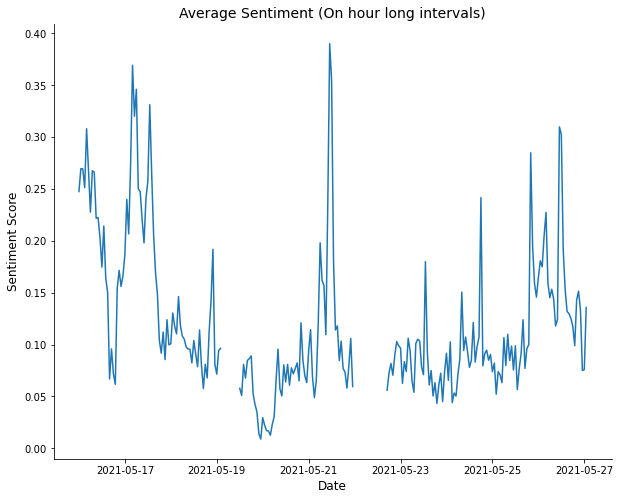

In [38]:
plt.figure(figsize=(10,8))
plt.plot(doge2.datetime, doge2.sentiment)
sns.despine()
plt.title('Average Sentiment (On hour long intervals)', fontsize=14)
plt.xlabel('Date', fontsize=12), plt.ylabel('Sentiment Score', fontsize=12)

In [39]:
dogestock =  pd.read_excel('Doge Prices.xlsx')

In [40]:
dogestock

,time,2021-05-10 00:00:00,2021-05-11 00:00:00,2021-05-12 00:00:00,2021-05-13 00:00:00,2021-05-14 00:00:00,2021-05-15 00:00:00,2021-05-16 00:00:00,2021-05-17 00:00:00,2021-05-18 00:00:00,2021-05-19 00:00:00,2021-05-20 00:00:00,2021-05-21 00:00:00,2021-05-22 00:00:00,2021-05-23 00:00:00,2021-05-24 00:00:00,2021-05-25 00:00:00,2021-05-26 00:00:00,2021-05-27 00:00:00
0,00:00:00,0.540396,0.476516,0.499943,0.438236,0.561090,0.527561,0.538914,0.488069,0.496769,0.413941,0.363097,0.389672,0.325389,0.338370,0.311615,0.359013,0.363142,0.339419
1,01:00:00,0.549276,0.463716,0.508953,0.431745,0.533690,0.520470,0.531570,0.505269,0.492820,0.418815,0.380074,0.387869,0.330570,0.334157,0.329897,0.356710,0.363840,0.338689
2,02:00:00,0.532937,0.522788,0.504390,0.418163,0.527780,0.520102,0.528626,0.508921,0.492898,0.421298,0.365692,0.384833,0.347504,0.325179,0.326641,0.348547,0.357693,0.342854
3,03:00:00,0.518746,0.522871,0.500378,0.394687,0.524304,0.521015,0.532172,0.502956,0.494260,0.419479,0.359699,0.394772,0.347197,0.316202,0.322777,0.348310,0.357239,0.344158
4,04:00:00,0.512107,0.503699,0.493062,0.401156,0.526812,0.508212,0.530040,0.502925,0.500145,0.402826,0.420821,0.395548,0.349219,0.327459,0.319723,0.326765,0.351895,0.343010
5,05:00:00,0.512302,0.507744,0.496949,0.397639,0.527868,0.514006,0.528740,0.505414,0.500900,0.379399,0.400482,0.388062,0.349181,0.321800,0.331937,0.337958,0.353431,0.344713
6,06:00:00,0.514731,0.492008,0.494434,0.408810,0.535866,0.525810,0.519355,0.506683,0.487099,0.331856,0.423614,0.390125,0.352429,0.293655,0.332579,0.332158,0.355979,0.342247
7,07:00:00,0.503583,0.490468,0.491956,0.418649,0.530747,0.520908,0.520164,0.499798,0.485234,0.361087,0.407389,0.392399,0.355233,0.287525,0.333222,0.347011,0.346546,0.343385
8,08:00:00,0.498661,0.504854,0.489585,0.427158,0.540986,0.516006,0.516117,0.490055,0.476225,0.332691,0.417613,0.375307,0.342678,0.304011,0.330182,0.346578,0.347585,0.341734
9,09:00:00,0.517733,0.502617,0.477057,0.407609,0.545911,0.516442,0.512070,0.480312,0.478326,0.402944,0.417685,0.358215,0.346679,0.288540,0.334586,0.344014,0.343927,0.339560


In [41]:
dogestock = pd.melt(dogestock, id_vars="time")
dogestock = dogestock.rename(columns={'variable':'date', 'value':'price'})

In [42]:
dogestock['datetime'] = dogestock.date.astype(str) + ' ' + dogestock.time.astype(str)
dogestock.datetime = pd.to_datetime(dogestock.datetime)
dogestock = dogestock.drop(['time', 'date'], axis=1)

In [43]:
dogestock

,price,datetime
0,0.540396,2021-05-10 00:00:00
1,0.549276,2021-05-10 01:00:00
2,0.532937,2021-05-10 02:00:00
3,0.518746,2021-05-10 03:00:00
4,0.512107,2021-05-10 04:00:00
...,...,...
427,0.330711,2021-05-27 19:00:00
428,0.332664,2021-05-27 20:00:00
429,0.332321,2021-05-27 21:00:00
430,0.334607,2021-05-27 22:00:00


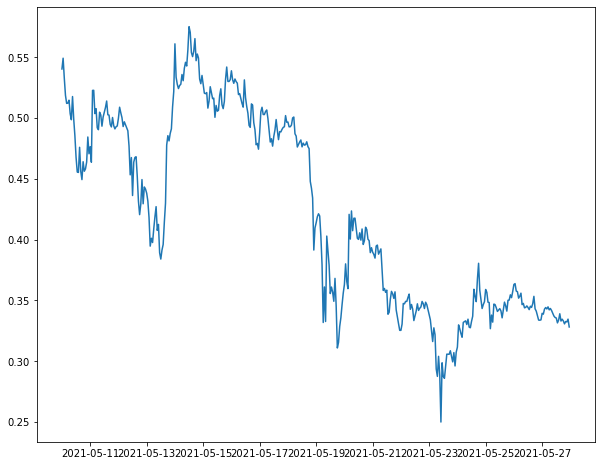

In [44]:
plt.figure(figsize=(10,8))
plt.plot(dogestock.datetime, dogestock.price)
plt.show()

In [45]:
dogecombined = doge2.merge(dogestock, on='datetime')

In [46]:
dogecombined['norm_sent'] = (dogecombined.sentiment-dogecombined.sentiment.min())/(dogecombined.sentiment.max()-dogecombined.sentiment.min())
dogecombined['norm_price'] = (dogecombined.price - dogecombined.price.min())/(dogecombined.price.max()-dogecombined.price.min())

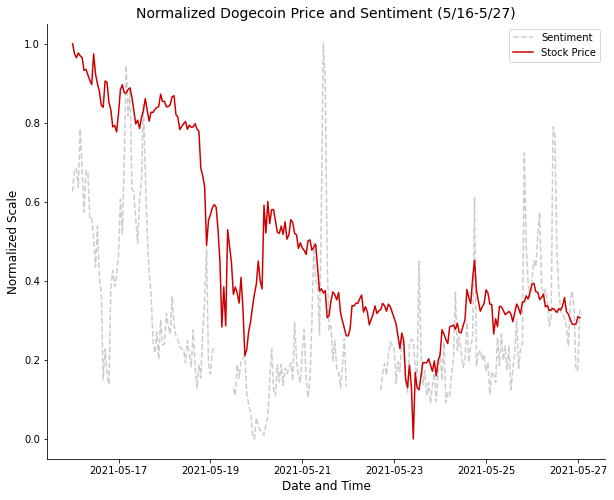

In [47]:
plt.figure(figsize=(10,8))
plt.plot(dogecombined.datetime, dogecombined.norm_sent, color="#cccccc", linestyle = '--', label='Sentiment')
plt.plot(dogecombined.datetime, dogecombined.norm_price, color='#cc0000', label='Stock Price')
sns.despine(top=True, right=True)
plt.xlabel('Date and Time', fontsize=12), plt.ylabel('Normalized Scale', fontsize=12)
plt.title('Normalized Dogecoin Price and Sentiment (5/16-5/27)', fontsize=14)
plt.legend()
plt.show()

In [48]:
doge

,datetime,tweet,cleaned,sentiment
56326,2021-05-16 01:09:38,@CoinFrenchie This is a very potential project...,"potenti project, realli good one, love project...",0.60
56325,2021-05-16 01:09:41,@SolanaCATO Go all in \n$SAMO $SOL $SRM $DOGE\...,go \n$samo $sol $srm $doge\n\n',0.00
56324,2021-05-16 01:09:41,"Great project, this is a very good project and...","great project, good project great potential, h...",0.56
56321,2021-05-16 01:09:43,@SolanaCATO Good project..\n\n@Iasep7 \n@Alif9...,good project..\n\n \n \n\n$samo $sol $srm $doge',0.70
56323,2021-05-16 01:09:43,@CoinFrenchie Good project\n$FRENCH $SOL $SAKI...,good project\n$french $sol $sakita $doge',0.70
...,...,...,...,...
88434,2021-05-27 02:06:11,This ALTSTEINN is really Genius!\n\n\xf0\x9f\x...,altsteinn realli genius!\n\n\xf0\x9f\x9a\x80\x...,0.00
88433,2021-05-27 02:06:12,@bholman24930782 @DogecoinGalaxy @ImTravisG @H...,\xe2\x80\xa6 https://t.co/gqpbbilflv',0.00
88432,2021-05-27 02:06:19,@LloydOstertagg @melaniemadri We love $DOGE an...,love $doge sis/bros.',0.50
88431,2021-05-27 02:07:14,\xe2\x80\x9cSit your punk ass down and watch m...,\xe2\x80\x9csit punk ass watch me.\xe2\x80\x9d...,0.00


In [49]:
doge2h = doge.resample(rule='120min', on='datetime').mean()
stock2h = dogestock.resample(rule='120min', on='datetime').mean()

In [50]:
doge2h = doge2h.reset_index()
stock2h = stock2h.reset_index()

In [51]:
combine2h = doge2h.merge(stock2h, on='datetime')

In [52]:
combine2h['norm_sent'] = (combine2h.sentiment-combine2h.sentiment.min())/(combine2h.sentiment.max()-combine2h.sentiment.min())
combine2h['norm_price'] = (combine2h.price - combine2h.price.min())/(combine2h.price.max()-combine2h.price.min())

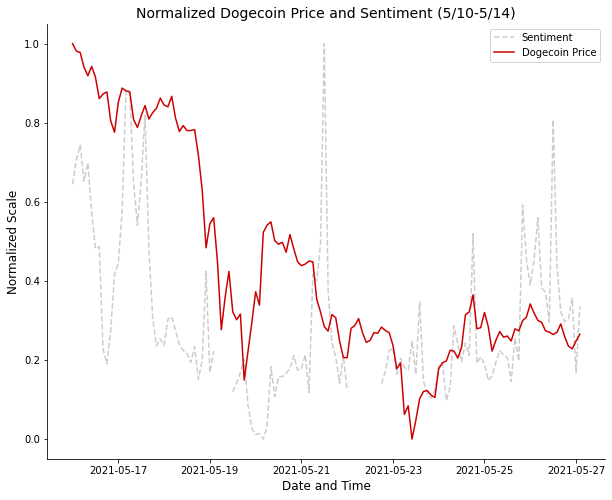

In [53]:
plt.figure(figsize=(10,8))
plt.plot(combine2h.datetime, combine2h.norm_sent, color="#cccccc", linestyle = '--', label='Sentiment')
plt.plot(combine2h.datetime, combine2h.norm_price, color='#cc0000', label='Dogecoin Price')
sns.despine(top=True, right=True)
plt.xlabel('Date and Time', fontsize=12), plt.ylabel('Normalized Scale', fontsize=12)
plt.title('Normalized Dogecoin Price and Sentiment (5/10-5/14)', fontsize=14)
plt.legend()
plt.show()

In [54]:
combine2h['pctchange_sent'] = combine2h.sentiment.pct_change()
combine2h['pctchange_price'] = combine2h.price.pct_change()

In [55]:
combine2h

,datetime,sentiment,price,norm_sent,norm_price,pctchange_sent,pctchange_price
0,2021-05-16 00:00:00,0.247521,0.535242,0.644761,1.000000,NaN,NaN
1,2021-05-16 02:00:00,0.269512,0.530399,0.705674,0.981438,0.088842,-0.009048
2,2021-05-16 04:00:00,0.283195,0.529390,0.743578,0.977571,0.050771,-0.001902
3,2021-05-16 06:00:00,0.250311,0.519759,0.652487,0.940659,-0.116120,-0.018192
4,2021-05-16 08:00:00,0.266937,0.514093,0.698543,0.918942,0.066425,-0.010901
...,...,...,...,...,...,...,...
129,2021-05-26 18:00:00,0.121928,0.342160,0.296866,0.259957,-0.068752,-0.023315
130,2021-05-26 20:00:00,0.124370,0.335651,0.303630,0.235013,0.020028,-0.019020
131,2021-05-26 22:00:00,0.143450,0.333871,0.356484,0.228189,0.153418,-0.005305
132,2021-05-27 00:00:00,0.075404,0.339054,0.167994,0.248054,-0.474356,0.015524


In [56]:
combine2h['sent_result'] = np.where(combine2h['pctchange_sent'] > 0, 1, 0)
combine2h['price_result'] = np.where(combine2h['pctchange_price'] > 0, 1, 0)

In [57]:
combine2h

,datetime,sentiment,price,norm_sent,norm_price,pctchange_sent,pctchange_price,sent_result,price_result
0,2021-05-16 00:00:00,0.247521,0.535242,0.644761,1.000000,NaN,NaN,0,0
1,2021-05-16 02:00:00,0.269512,0.530399,0.705674,0.981438,0.088842,-0.009048,1,0
2,2021-05-16 04:00:00,0.283195,0.529390,0.743578,0.977571,0.050771,-0.001902,1,0
3,2021-05-16 06:00:00,0.250311,0.519759,0.652487,0.940659,-0.116120,-0.018192,0,0
4,2021-05-16 08:00:00,0.266937,0.514093,0.698543,0.918942,0.066425,-0.010901,1,0
...,...,...,...,...,...,...,...,...,...
129,2021-05-26 18:00:00,0.121928,0.342160,0.296866,0.259957,-0.068752,-0.023315,0,0
130,2021-05-26 20:00:00,0.124370,0.335651,0.303630,0.235013,0.020028,-0.019020,1,0
131,2021-05-26 22:00:00,0.143450,0.333871,0.356484,0.228189,0.153418,-0.005305,1,0
132,2021-05-27 00:00:00,0.075404,0.339054,0.167994,0.248054,-0.474356,0.015524,0,1


In [58]:
combine2h['matching'] = combine2h.sent_result + combine2h.price_result

In [59]:
combine2h.matching.value_counts()

1    69
0    38
2    27
Name: matching, dtype: int64

In [60]:
dogecombined['pctchange_sent'] = dogecombined.sentiment.pct_change()
dogecombined['pctchange_price'] = dogecombined.price.pct_change()

In [61]:
dogecombined['sent_result'] = np.where(dogecombined['pctchange_sent'] > 0, 1, 0)
dogecombined['price_result'] = np.where(dogecombined['pctchange_price'] > 0, 1, 0)

In [62]:
dogecombined['matching'] = dogecombined.sent_result + dogecombined.price_result

In [63]:
dogecombined.matching.value_counts()

1    127
0     88
2     51
Name: matching, dtype: int64

In [64]:
onlypos = combine2h[combine2h.sent_result == 1]

In [65]:
onlypos.price_result.value_counts()

0    33
1    27
Name: price_result, dtype: int64

In [66]:
teslacombined

,timestamp,sentiment,price,norm_sent,norm_price
0,2021-05-10 09:30:00,0.040690,659.30,0.202241,1.000000
1,2021-05-10 10:00:00,0.048089,649.99,0.253802,0.916487
2,2021-05-10 10:30:00,0.041105,645.55,0.205134,0.876659
3,2021-05-10 11:00:00,0.026727,644.48,0.104932,0.867061
4,2021-05-10 11:30:00,0.118714,643.93,0.745973,0.862128
...,...,...,...,...,...
163,2021-05-26 14:00:00,0.074873,622.77,0.440457,0.672318
164,2021-05-26 14:30:00,0.119256,623.82,0.749751,0.681737
165,2021-05-26 15:00:00,0.060119,622.14,0.337636,0.666667
166,2021-05-26 15:30:00,0.078281,622.72,0.464206,0.671869


In [67]:
week1 = teslacombined[teslacombined.timestamp<'2021-05-15']

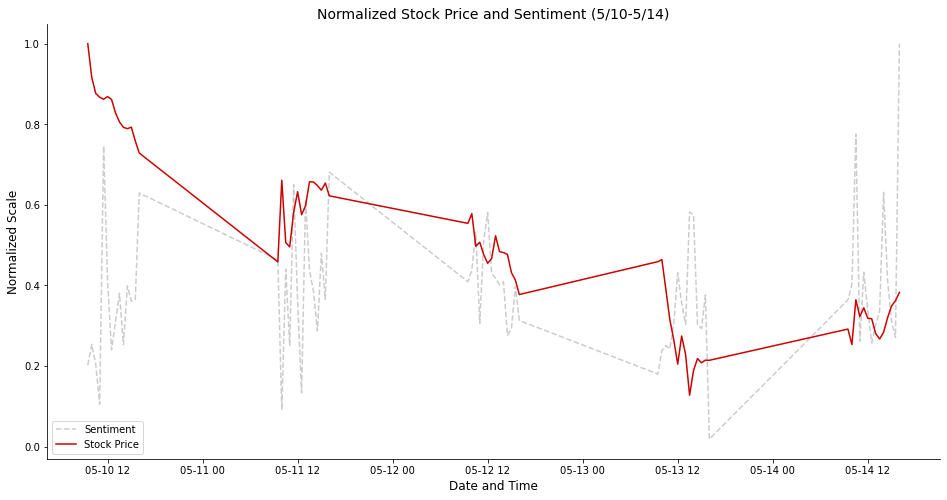

In [68]:
plt.figure(figsize=(16,8))
plt.plot(week1.timestamp, week1.norm_sent, color="#cccccc", linestyle = '--', label='Sentiment')
plt.plot(week1.timestamp, week1.norm_price, color='#cc0000', label='Stock Price')
sns.despine(top=True, right=True)
plt.xlabel('Date and Time', fontsize=12), plt.ylabel('Normalized Scale', fontsize=12)
plt.title('Normalized Stock Price and Sentiment (5/10-5/14)', fontsize=14)
plt.legend()
plt.show()

In [69]:
week2 = teslacombined.loc[(teslacombined.timestamp>'2021-05-18') & (teslacombined.timestamp<'2021-05-22')]

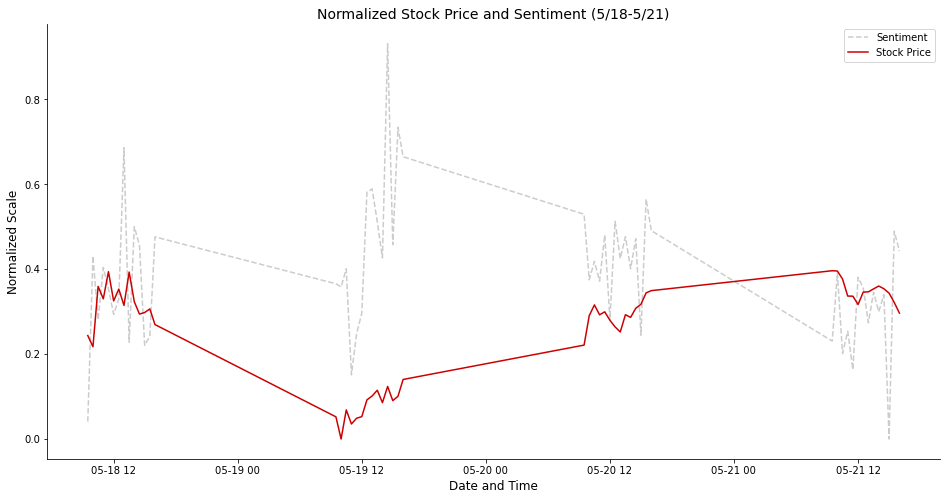

In [70]:
plt.figure(figsize=(16,8))
plt.plot(week2.timestamp, week2.norm_sent, color="#cccccc", linestyle = '--', label='Sentiment')
plt.plot(week2.timestamp, week2.norm_price, color='#cc0000', label='Stock Price')
sns.despine(top=True, right=True)
plt.xlabel('Date and Time', fontsize=12), plt.ylabel('Normalized Scale', fontsize=12)
plt.title('Normalized Stock Price and Sentiment (5/18-5/21)', fontsize=14)
plt.legend()
plt.show()

In [71]:
teslacombined['pctchange_sent'] = teslacombined.sentiment.pct_change()
teslacombined['pctchange_price'] = teslacombined.price.pct_change()

In [72]:
teslacombined

,timestamp,sentiment,price,norm_sent,norm_price,pctchange_sent,pctchange_price
0,2021-05-10 09:30:00,0.040690,659.30,0.202241,1.000000,NaN,NaN
1,2021-05-10 10:00:00,0.048089,649.99,0.253802,0.916487,0.181831,-0.014121
2,2021-05-10 10:30:00,0.041105,645.55,0.205134,0.876659,-0.145224,-0.006831
3,2021-05-10 11:00:00,0.026727,644.48,0.104932,0.867061,-0.349794,-0.001658
4,2021-05-10 11:30:00,0.118714,643.93,0.745973,0.862128,3.441708,-0.000853
...,...,...,...,...,...,...,...
163,2021-05-26 14:00:00,0.074873,622.77,0.440457,0.672318,0.507946,0.000337
164,2021-05-26 14:30:00,0.119256,623.82,0.749751,0.681737,0.592766,0.001686
165,2021-05-26 15:00:00,0.060119,622.14,0.337636,0.666667,-0.495881,-0.002693
166,2021-05-26 15:30:00,0.078281,622.72,0.464206,0.671869,0.302105,0.000932


In [73]:
teslacombined['sent_result'] = np.where(teslacombined['pctchange_sent'] > 0, 1, 0)
teslacombined['price_result'] = np.where(teslacombined['pctchange_price'] > 0, 1, 0)

In [74]:
teslacombined

,timestamp,sentiment,price,norm_sent,norm_price,pctchange_sent,pctchange_price,sent_result,price_result
0,2021-05-10 09:30:00,0.040690,659.30,0.202241,1.000000,NaN,NaN,0,0
1,2021-05-10 10:00:00,0.048089,649.99,0.253802,0.916487,0.181831,-0.014121,1,0
2,2021-05-10 10:30:00,0.041105,645.55,0.205134,0.876659,-0.145224,-0.006831,0,0
3,2021-05-10 11:00:00,0.026727,644.48,0.104932,0.867061,-0.349794,-0.001658,0,0
4,2021-05-10 11:30:00,0.118714,643.93,0.745973,0.862128,3.441708,-0.000853,1,0
...,...,...,...,...,...,...,...,...,...
163,2021-05-26 14:00:00,0.074873,622.77,0.440457,0.672318,0.507946,0.000337,1,1
164,2021-05-26 14:30:00,0.119256,623.82,0.749751,0.681737,0.592766,0.001686,1,1
165,2021-05-26 15:00:00,0.060119,622.14,0.337636,0.666667,-0.495881,-0.002693,0,0
166,2021-05-26 15:30:00,0.078281,622.72,0.464206,0.671869,0.302105,0.000932,1,1


In [75]:
buy = teslacombined[teslacombined.sent_result == 1]

In [76]:
buy.price_result.value_counts()

0    42
1    39
Name: price_result, dtype: int64

In [77]:
buying = dogecombined[dogecombined.sent_result == 1]

In [78]:
buying.price_result.value_counts()

0    57
1    51
Name: price_result, dtype: int64

In [79]:
dogecombined.price_result.value_counts()

0    145
1    121
Name: price_result, dtype: int64

In [80]:
teslacombined.price_result.value_counts()

0    89
1    79
Name: price_result, dtype: int64

In [81]:
dogecombined.price.min()

0.249974

In [83]:
teslacombined2w = teslacombined.loc[(teslacombined.timestamp < '2021-05-22')]

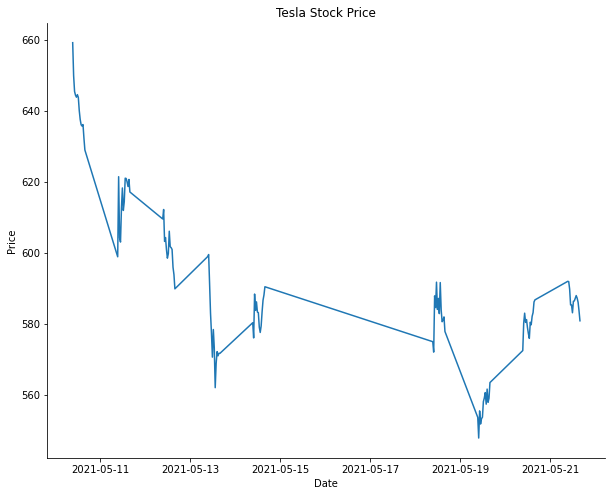

In [87]:
plt.figure(figsize=(10,8))
plt.plot(teslacombined2w.timestamp, teslacombined2w.price)
plt.title('Tesla Stock Price')
plt.xlabel('Date'), plt.ylabel('Price')
sns.despine()
plt.show()

In [88]:
dogecombined.price.describe()

count    266.000000
mean       0.389207
std        0.069469
min        0.249974
25%        0.341345
50%        0.356750
75%        0.467807
max        0.538914
Name: price, dtype: float64